# Classical Classifier

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('BBox_clean_radiomics_table.csv')

In [3]:
data['Finding Label'] = pd.Categorical(pd.factorize(data['Finding Label'])[0] + 1)

In [4]:
X, y = data.iloc[:, 6:], data['Finding Label']
X.fillna(0, inplace=True)

In [5]:
X.shape

(984, 102)

In [6]:
feature_names = X.columns.values

In [7]:
X, y = X.to_numpy(), y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Optimal number of features : 39


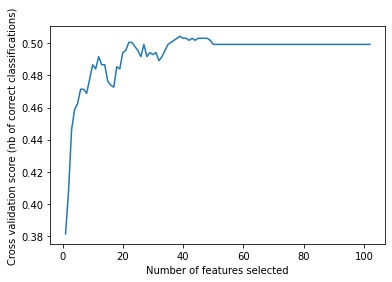

In [9]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [10]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False])

In [11]:
X_train_reduced = rfecv.transform(X_train)
X_test_reduced = rfecv.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(random_state=0).fit(X_train_reduced, y_train)
y_pred = clf.predict(X_test_reduced)
y_prob = clf.predict_proba(X_test_reduced)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  5  1  0  0  4  1]
 [ 0 34  0  0  0  0  0  0]
 [12  1 13  0  0  1  2  1]
 [ 5  1  5  6  1  0 10  1]
 [ 3  2  2  2  6  3  2  1]
 [ 2  0  0  0  1 12  0  1]
 [ 7  0  3  2  1  0  8  1]
 [ 4  0  2  2  2  0  2  3]]
              precision    recall  f1-score   support

           1       0.37      0.63      0.46        30
           2       0.89      1.00      0.94        34
           3       0.43      0.43      0.43        30
           4       0.46      0.21      0.29        29
           5       0.55      0.29      0.37        21
           6       0.75      0.75      0.75        16
           7       0.29      0.36      0.32        22
           8       0.33      0.20      0.25        15

    accuracy                           0.51       197
   macro avg       0.51      0.48      0.48       197
weighted avg       0.52      0.51      0.50       197



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
from sklearn.metrics import roc_auc_score

In [32]:
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")

In [33]:
print(weighted_roc_auc_ovr)

0.863685792461331


In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=250, random_state=0, criterion='entropy').fit(X_train_reduced, y_train)
y_pred = clf.predict(X_test_reduced)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  5  1  0  1  4  0]
 [ 0 32  1  0  1  0  0  0]
 [10  1 11  2  0  1  2  3]
 [ 3  0  6  8  1  0 10  1]
 [ 5  0  1  1  5  2  2  5]
 [ 1  0  0  0  3 12  0  0]
 [ 5  0  3  5  1  0  6  2]
 [ 4  0  1  1  1  0  1  7]]
              precision    recall  f1-score   support

           1       0.40      0.63      0.49        30
           2       0.97      0.94      0.96        34
           3       0.39      0.37      0.38        30
           4       0.44      0.28      0.34        29
           5       0.42      0.24      0.30        21
           6       0.75      0.75      0.75        16
           7       0.24      0.27      0.26        22
           8       0.39      0.47      0.42        15

    accuracy                           0.51       197
   macro avg       0.50      0.49      0.49       197
weighted avg       0.52      0.51      0.50       197



# Permutation Importance with Multicollinear or Correlated Features

In [21]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [22]:
clf = RandomForestClassifier(n_estimators=300, random_state=0).fit(X_train, y_train)

In [23]:
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test data: 0.48


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


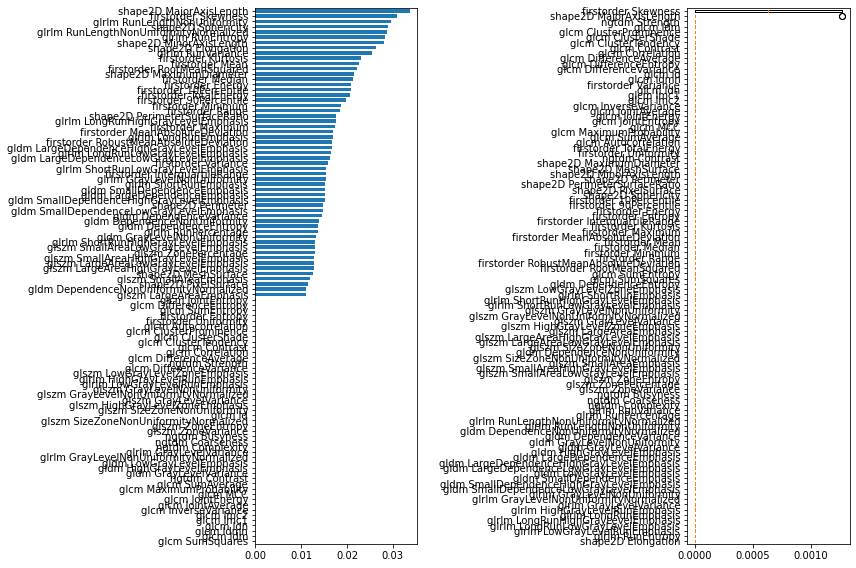

In [24]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(feature_names[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=feature_names[perm_sorted_idx])
fig.tight_layout()
plt.show()

/Users/yanhan/Library/Python/3.7/lib/python/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/yanhan/Library/Python/3.7/lib/python/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/yanhan/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/yanhan/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/yanhan/Library/Python/3.7/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


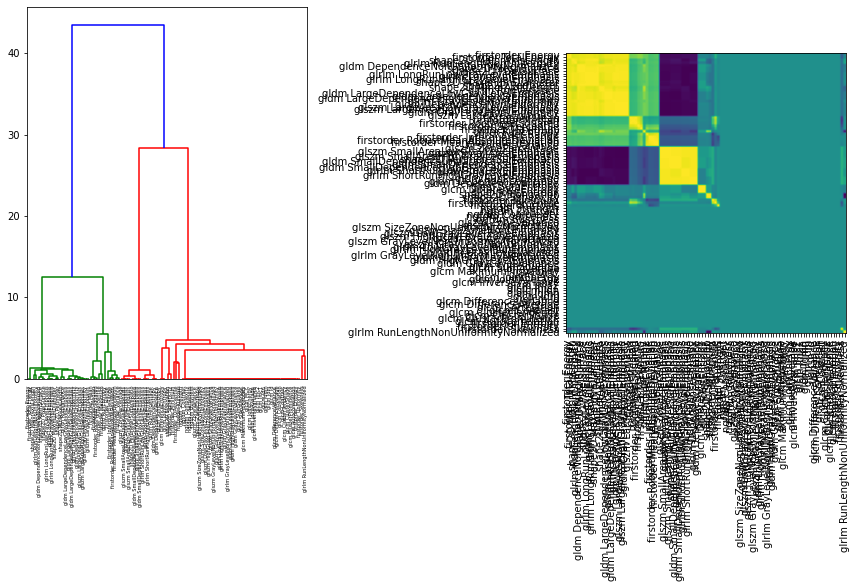

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation
corr = np.nan_to_num(corr)
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=feature_names.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [35]:
feature_names[selected_features]

array(['shape2D Elongation', 'shape2D MajorAxisLength',
       'shape2D MaximumDiameter', 'shape2D MinorAxisLength',
       'shape2D PerimeterSurfaceRatio', 'firstorder 10Percentile',
       'firstorder 90Percentile', 'firstorder Energy',
       'firstorder Entropy', 'firstorder InterquartileRange',
       'firstorder Kurtosis', 'firstorder Mean', 'firstorder Minimum',
       'firstorder Skewness', 'glcm DifferenceEntropy',
       'gldm DependenceEntropy', 'gldm DependenceNonUniformity',
       'glrlm RunEntropy', 'glrlm RunLengthNonUniformityNormalized'],
      dtype=object)

In [39]:
X[feature_names[selected_features]]

,shape2D Elongation,shape2D MajorAxisLength,shape2D MaximumDiameter,shape2D MinorAxisLength,shape2D PerimeterSurfaceRatio,firstorder 10Percentile,firstorder 90Percentile,firstorder Energy,firstorder Entropy,firstorder InterquartileRange,firstorder Kurtosis,firstorder Mean,firstorder Minimum,firstorder Skewness,glcm DifferenceEntropy,gldm DependenceEntropy,gldm DependenceNonUniformity,glrlm RunEntropy,glrlm RunLengthNonUniformityNormalized
0,0.908033,100.452310,116.846053,91.214034,0.048138,0.192157,0.349020,494.606671,-3.203427e-16,0.078431,2.526607,0.261919,0.125490,0.412068,-3.203427e-16,0.281179,6247.929143,3.123981,0.507218
1,0.594244,361.419424,363.584928,214.771196,0.017122,0.356863,0.631373,14225.787831,-3.203427e-16,0.133333,2.638966,0.483979,0.149020,-0.108015,-3.203427e-16,0.125325,56263.806589,3.208917,0.534524
2,0.714278,250.567356,266.092089,178.974859,0.022085,0.286275,0.431373,4540.319281,-3.203427e-16,0.078431,2.324995,0.363502,0.223529,-0.016251,-3.203427e-16,0.153599,32187.386264,3.345038,0.516656
3,0.390016,162.808681,150.986754,63.498031,0.050400,0.215686,0.403922,794.378862,-3.203427e-16,0.113725,2.138522,0.312036,0.129412,-0.062377,-3.203427e-16,0.290678,7017.428885,2.089470,0.602367
4,0.388033,232.091936,215.244048,90.059240,0.035518,0.368627,0.576471,3845.412031,-3.203427e-16,0.113726,2.782358,0.488705,0.235294,-0.709812,-3.203427e-16,0.222665,14608.871795,2.231556,0.601470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.525201,710.139892,694.196658,372.966486,0.009438,0.262745,0.521569,34723.326792,-3.203427e-16,0.168627,1.827031,0.406813,0.176471,-0.386826,-3.203427e-16,0.077157,194936.207652,3.311052,0.549624
980,0.621313,118.928550,120.739389,73.891813,0.050494,0.419608,0.603922,1824.707957,-3.203427e-16,0.086275,2.775151,0.521946,0.317647,-0.520446,-3.203427e-16,0.291388,5964.644417,2.666805,0.533604
981,0.345571,314.076424,287.459562,108.535708,0.028584,0.376471,0.764706,9798.989150,-3.203427e-16,0.188235,2.290583,0.604513,0.290196,-0.540967,-3.203427e-16,0.188075,24153.230288,2.166009,0.621648
982,0.424474,282.899275,265.770578,120.083304,0.027349,0.227451,0.768627,8247.711163,-3.203427e-16,0.376471,1.781377,0.530450,0.098039,-0.352153,-3.203427e-16,0.181734,24129.588383,2.466782,0.584952


In [41]:
BBox_clean_reduced_features = pd.concat([data.iloc[:, :6], X[feature_names[selected_features]]], axis=1)

In [43]:
BBox_clean_reduced_features

,Image Index,Finding Label,Bbox [x,y,w,h],shape2D Elongation,shape2D MajorAxisLength,shape2D MaximumDiameter,shape2D MinorAxisLength,...,firstorder InterquartileRange,firstorder Kurtosis,firstorder Mean,firstorder Minimum,firstorder Skewness,glcm DifferenceEntropy,gldm DependenceEntropy,gldm DependenceNonUniformity,glrlm RunEntropy,glrlm RunLengthNonUniformityNormalized
0,00013118_008.png,1,225.084746,547.019217,86.779661,79.186441,0.908033,100.452310,116.846053,91.214034,...,0.078431,2.526607,0.261919,0.125490,0.412068,-3.203427e-16,0.281179,6247.929143,3.123981,0.507218
1,00014716_007.png,1,686.101695,131.543498,185.491525,313.491525,0.594244,361.419424,363.584928,214.771196,...,0.133333,2.638966,0.483979,0.149020,-0.108015,-3.203427e-16,0.125325,56263.806589,3.208917,0.534524
2,00029817_009.png,1,221.830508,317.053115,155.118644,216.949153,0.714278,250.567356,266.092089,178.974859,...,0.078431,2.324995,0.363502,0.223529,-0.016251,-3.203427e-16,0.153599,32187.386264,3.345038,0.516656
3,00014687_001.png,1,726.237288,494.951420,141.016949,55.322034,0.390016,162.808681,150.986754,63.498031,...,0.113725,2.138522,0.312036,0.129412,-0.062377,-3.203427e-16,0.290678,7017.428885,2.089470,0.602367
4,00017877_001.png,1,660.067797,569.780787,200.677966,78.101695,0.388033,232.091936,215.244048,90.059240,...,0.113726,2.782358,0.488705,0.235294,-0.709812,-3.203427e-16,0.222665,14608.871795,2.231556,0.601470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,1,198.940451,352.900747,615.537778,323.128889,0.525201,710.139892,694.196658,372.966486,...,0.168627,1.827031,0.406813,0.176471,-0.386826,-3.203427e-16,0.077157,194936.207652,3.311052,0.549624
980,00025769_001.png,1,701.838229,572.491858,103.537778,63.715556,0.621313,118.928550,120.739389,73.891813,...,0.086275,2.775151,0.521946,0.317647,-0.520446,-3.203427e-16,0.291388,5964.644417,2.666805,0.533604
981,00016837_002.png,1,140.913785,658.962969,271.928889,94.435556,0.345571,314.076424,287.459562,108.535708,...,0.188235,2.290583,0.604513,0.290196,-0.540967,-3.203427e-16,0.188075,24153.230288,2.166009,0.621648
982,00020124_003.png,1,175.047118,580.456302,244.622222,103.537778,0.424474,282.899275,265.770578,120.083304,...,0.376471,1.781377,0.530450,0.098039,-0.352153,-3.203427e-16,0.181734,24129.588383,2.466782,0.584952


In [27]:
selected_features

[0, 1, 2, 4, 6, 9, 10, 11, 12, 13, 14, 17, 19, 23, 34, 51, 52, 73, 75]

In [26]:
cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X = X[:, selected_features]
X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

clf_sel = RandomForestClassifier(n_estimators=200, random_state=42)
clf_sel.fit(X_train_sel, y_train)
print("Accuracy on test data with features removed: {:.2f}".format(
      clf_sel.score(X_test_sel, y_test)))

Accuracy on test data with features removed: 0.50


In [28]:
X.shape

(984, 19)

In [29]:
X_train_sel.shape

(787, 19)

In [32]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  1  5  1  1  0  3  2]
 [ 0 34  0  0  0  0  0  0]
 [12  1 12  0  1  1  2  1]
 [ 5  3  7  5  1  0  8  0]
 [ 4  2  3  2  6  2  1  1]
 [ 1  0  0  0  1 14  0  0]
 [ 8  1  2  1  1  0  6  3]
 [ 4  0  2  3  2  0  2  2]]
              precision    recall  f1-score   support

           1       0.33      0.57      0.42        30
           2       0.81      1.00      0.89        34
           3       0.39      0.40      0.39        30
           4       0.42      0.17      0.24        29
           5       0.46      0.29      0.35        21
           6       0.82      0.88      0.85        16
           7       0.27      0.27      0.27        22
           8       0.22      0.13      0.17        15

    accuracy                           0.49       197
   macro avg       0.47      0.46      0.45       197
weighted avg       0.47      0.49      0.46       197



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
y_pred = clf_sel.predict(X_test_sel)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  0  6  0  0  1  6  0]
 [ 0 32  1  0  0  0  1  0]
 [11  1 13  1  0  0  1  3]
 [ 2  0  6 10  1  0  7  3]
 [ 3  0  2  3  4  3  2  4]
 [ 1  0  0  0  2 13  0  0]
 [ 5  0  3  6  1  0  4  3]
 [ 5  0  1  2  0  0  1  6]]
              precision    recall  f1-score   support

           1       0.39      0.57      0.46        30
           2       0.97      0.94      0.96        34
           3       0.41      0.43      0.42        30
           4       0.45      0.34      0.39        29
           5       0.50      0.19      0.28        21
           6       0.76      0.81      0.79        16
           7       0.18      0.18      0.18        22
           8       0.32      0.40      0.35        15

    accuracy                           0.50       197
   macro avg       0.50      0.48      0.48       197
weighted avg       0.51      0.50      0.50       197



# XGBoost

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score

In [19]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

In [20]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_sel, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
y_pred = model.predict(X_test_sel)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  5  1  0  1  6  1]
 [ 0 33  0  0  0  0  1  0]
 [11  1 11  1  1  0  2  3]
 [ 3  0  3  8  2  0 12  1]
 [ 4  0  3  2  5  1  1  5]
 [ 1  0  0  0  3 12  0  0]
 [ 4  0  3  4  1  1  8  1]
 [ 2  0  3  2  1  0  2  5]]
              precision    recall  f1-score   support

           1       0.39      0.53      0.45        30
           2       0.97      0.97      0.97        34
           3       0.39      0.37      0.38        30
           4       0.44      0.28      0.34        29
           5       0.38      0.24      0.29        21
           6       0.80      0.75      0.77        16
           7       0.25      0.36      0.30        22
           8       0.31      0.33      0.32        15

    accuracy                           0.50       197
   macro avg       0.49      0.48      0.48       197
weighted avg       0.51      0.50      0.50       197



In [25]:
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True)

In [22]:
clfs = [RandomForestClassifier(), ExtraTreesClassifier()]
clfs_name = ['rf1', 'rf2', 'rf3']

In [36]:
for j, clf in enumerate(clfs):
    
    for i, (train, test) in enumerate(skf.split(X, y), start=1):
        print(f"fold {i}:")
        model = clf
        
        X_train = X[train]
        y_train = y[train]
        
        X_test = X[test]
        y_test = y[test]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        print(accuracy_score(y_test, y_pred))

fold 1:
0.5177664974619289
fold 2:
0.4720812182741117
fold 3:
0.49238578680203043
fold 4:
0.47715736040609136
fold 5:
0.4846938775510204
fold 1:
0.49238578680203043
fold 2:
0.4873096446700508
fold 3:
0.4619289340101523
fold 4:
0.4873096446700508
fold 5:
0.44387755102040816


# Kaggle Dataset

In [3]:
data1 = pd.read_csv('Kaggle_Pneumonia_Full_BBox_clean_radiomics_table.csv')
data2 = pd.read_csv('Kaggle_Full_BBox_clean_radiomics_table.csv')

In [4]:
data = pd.concat([data1, data2], axis=0, ignore_index=True)

In [5]:
data

,patientId,x,y,width,height,Target,shape2D Elongation,shape2D MajorAxisLength,shape2D MaximumDiameter,shape2D MeshSurface,...,glszm SmallAreaHighGrayLevelEmphasis,glszm SmallAreaLowGrayLevelEmphasis,glszm ZoneEntropy,glszm ZonePercentage,glszm ZoneVariance,ngtdm Busyness,ngtdm Coarseness,ngtdm Complexity,ngtdm Contrast,ngtdm Strength
0,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1.0,1180.103385,1444.619327,1044483.5,...,16.772907,0.037537,6.199768,0.003823,2.796929e+07,147.730118,0.000129,2.811436,0.005513,0.005839
1,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,1.0,1180.103385,1444.619327,1044483.5,...,16.772907,0.037537,6.199768,0.003823,2.796929e+07,147.730118,0.000129,2.811436,0.005513,0.005839
2,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,1.0,1180.103385,1444.619327,1044483.5,...,21.866634,0.030009,6.136490,0.004963,1.005434e+07,370.901044,0.000141,2.234485,0.013675,0.004658
3,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,1.0,1180.103385,1444.619327,1044483.5,...,21.866634,0.030009,6.136490,0.004963,1.005434e+07,370.901044,0.000141,2.234485,0.013675,0.004658
4,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1,1.0,1180.103385,1444.619327,1044483.5,...,10.772826,0.054211,5.651418,0.002783,1.451211e+08,217.325955,0.000196,1.625164,0.002895,0.011306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30222,c1cf3255-d734-4980-bfe0-967902ad7ed9,NaN,NaN,NaN,NaN,0,1.0,1180.103385,1444.619327,1044483.5,...,21.645793,0.019488,6.636977,0.003362,3.147620e+07,110.164997,0.000105,3.759584,0.012821,0.004710
30223,c1e228e4-b7b4-432b-a735-36c48fdb806f,NaN,NaN,NaN,NaN,0,1.0,1180.103385,1444.619327,1044483.5,...,24.822492,0.021860,6.089596,0.005811,8.846479e+06,241.398424,0.000108,2.645354,0.013553,0.003562
30224,c1e3eb82-c55a-471f-a57f-fe1a823469da,NaN,NaN,NaN,NaN,0,1.0,1180.103385,1444.619327,1044483.5,...,17.650450,0.027466,6.401714,0.004551,1.733458e+07,179.039117,0.000079,3.810281,0.004515,0.003571
30225,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0,1.0,1180.103385,1444.619327,1044483.5,...,28.482643,0.019794,5.772563,0.007699,1.022997e+07,178.979104,0.000098,3.760670,0.011830,0.004133


In [6]:
X, y = data.iloc[:, 6:], data['Target']

In [7]:
X, y = X.to_numpy(), y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4131    0]
 [   0 1915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4131
           1       1.00      1.00      1.00      1915

    accuracy                           1.00      6046
   macro avg       1.00      1.00      1.00      6046
weighted avg       1.00      1.00      1.00      6046



In [12]:
weighted_roc_auc_ovr = roc_auc_score(y_test, y_pred, average="weighted")

In [13]:
print(weighted_auc_ovr

SyntaxError: unexpected EOF while parsing (<ipython-input-13-6144f9f3c112>, line 1)

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=250, random_state=0, criterion='entropy').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4131    0]
 [   0 1915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4131
           1       1.00      1.00      1.00      1915

    accuracy                           1.00      6046
   macro avg       1.00      1.00      1.00      6046
weighted avg       1.00      1.00      1.00      6046



# Full Box

In [2]:
data1 = pd.read_csv('Kaggle_BBox_clean_reduced_radiomics_table.csv')
data2 = pd.read_csv('Kaggle_Full_BBox_clean_reduced_radiomics_table.csv')

In [3]:
data = pd.concat([data1, data2], axis=0, ignore_index=True)

In [11]:
data.iloc[:, 5:].corr()

,Target,shape2D Elongation,shape2D MajorAxisLength,shape2D MaximumDiameter,shape2D MinorAxisLength,shape2D PerimeterSurfaceRatio,firstorder 10Percentile,firstorder 90Percentile,firstorder Energy,firstorder Entropy,firstorder InterquartileRange,firstorder Kurtosis,firstorder Mean,firstorder Minimum,firstorder Skewness,glcm DifferenceEntropy,gldm DependenceEntropy,gldm DependenceNonUniformity,glrlm RunEntropy,glrlm RunLengthNonUniformityNormalized
Target,1.000000,-0.835664,-0.967054,-0.984585,-0.995709,0.853333,0.672943,-0.607708,-0.878833,-0.840930,-0.741198,0.086260,0.097105,0.866042,0.279093,-0.057625,-0.668199,-0.967935,-0.781957,-0.373582
shape2D Elongation,-0.835664,1.000000,0.711047,0.765838,0.827792,-0.624748,-0.564571,0.496036,0.720780,0.687887,0.614286,-0.044846,-0.082424,-0.724233,-0.290560,0.077343,0.559405,0.791692,0.610439,0.332506
shape2D MajorAxisLength,-0.967054,0.711047,1.000000,0.996199,0.980100,-0.929419,-0.648041,0.614095,0.863145,0.839174,0.727384,-0.098804,-0.079011,-0.847343,-0.244827,0.024668,0.653310,0.951796,0.809443,0.354444
shape2D MaximumDiameter,-0.984585,0.765838,0.996199,1.000000,0.993641,-0.916753,-0.660428,0.618756,0.874727,0.847574,0.737928,-0.095396,-0.083508,-0.860349,-0.259371,0.033971,0.663609,0.964150,0.809228,0.363891
shape2D MinorAxisLength,-0.995709,0.827792,0.980100,0.993641,1.000000,-0.891837,-0.668641,0.618155,0.879657,0.849052,0.743176,-0.090113,-0.087916,-0.867321,-0.275077,0.044785,0.669232,0.969072,0.800596,0.371938
shape2D PerimeterSurfaceRatio,0.853333,-0.624748,-0.929419,-0.916753,-0.891837,1.000000,0.563867,-0.592332,-0.772997,-0.781914,-0.660913,0.103668,0.032135,0.760124,0.213526,0.024722,-0.589096,-0.852813,-0.798755,-0.304974
firstorder 10Percentile,0.672943,-0.564571,-0.648041,-0.660428,-0.668641,0.563867,1.000000,-0.226916,-0.397950,-0.767164,-0.788902,0.487100,0.658521,0.777891,-0.246185,-0.370136,-0.745339,-0.586940,-0.484333,-0.497777
firstorder 90Percentile,-0.607708,0.496036,0.614095,0.618756,0.618155,-0.592332,-0.226916,1.000000,0.768655,0.707144,0.686855,-0.194181,0.528521,-0.400011,-0.245813,0.045169,0.574850,0.561749,0.665452,0.226281
firstorder Energy,-0.878833,0.720780,0.863145,0.874727,0.879657,-0.772997,-0.397950,0.768655,1.000000,0.755137,0.637763,0.044924,0.280510,-0.745768,-0.438176,-0.022862,0.573512,0.872377,0.794110,0.185435
firstorder Entropy,-0.840930,0.687887,0.839174,0.847574,0.849052,-0.781914,-0.767164,0.707144,0.755137,1.000000,0.890092,-0.386800,-0.141187,-0.857292,-0.011560,0.326871,0.919728,0.763153,0.765974,0.474368


In [20]:
X, y = data.iloc[:, 6:7], data['Target']
X, y = X.to_numpy(), y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X.shape

(30227, 1)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# X = scaler.transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4131    0]
 [  74 1841]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4131
           1       1.00      0.96      0.98      1915

    accuracy                           0.99      6046
   macro avg       0.99      0.98      0.99      6046
weighted avg       0.99      0.99      0.99      6046



# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=250, random_state=0, criterion='entropy').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4131    0]
 [   0 1915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4131
           1       1.00      1.00      1.00      1915

    accuracy                           1.00      6046
   macro avg       1.00      1.00      1.00      6046
weighted avg       1.00      1.00      1.00      6046



# SVC

In [15]:
model = SVC(probability=True)
model.fit(X_train, y_train)
class_probabilities = model.predict_proba(X_test)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4131    0]
 [   0 1915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4131
           1       1.00      1.00      1.00      1915

    accuracy                           1.00      6046
   macro avg       1.00      1.00      1.00      6046
weighted avg       1.00      1.00      1.00      6046



In [14]:
print(class_probabilities[0:5])

[[9.99911342e-01 8.86578536e-05]
 [9.99957212e-01 4.27884721e-05]
 [9.99988992e-01 1.10080853e-05]
 [2.42079088e-08 9.99999976e-01]
 [7.57473759e-08 9.99999924e-01]]
